In [1]:
# Loading required libraries
import pandas as pd
import datetime
import numpy as np
import json
import urllib2
import matplotlib.pyplot as plt
import matplotlib
import glob

%pylab inline
jsonFile = urllib2.urlopen('https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json')
s = json.load(jsonFile)
plt.rcParams.update(s)

matplotlib.rcParams.update({'font.size': 16})
#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def dttime(row):
    return datetime.datetime(int(row['Year']), 
                             int(row['Month']), 
                             int(row['Day']), 
                             int(row['Hour']))

In [3]:
files = glob.glob("*.csv")
files

['All_bbl.csv',
 'BK.csv',
 'BX.csv',
 'check.csv',
 'latest.csv',
 'latest1.csv',
 'lpbread.csv',
 'lpep_demand_all_datetimes.csv',
 'lpep_demand_freemins.csv',
 'lpep_freemins_all_datetimes.csv',
 'lpep_wav_triprecord_total.csv',
 'MN.csv',
 'MN_cluster.csv',
 'QN.csv',
 'rough.csv',
 'SI.csv',
 'top20.csv',
 'top21.csv',
 'top25.csv',
 'topbbl.csv',
 'total_demand_freemins.csv',
 'total_demand_freemins_all_bbls.csv',
 'total_freemins.csv',
 'totaldemandratio.csv',
 'tpep_demand_all_datetimes.csv',
 'tpep_demand_freemins.csv',
 'tpep_freemins_all_datetimes.csv']

#### Overall Datetime

In [5]:
# Computing the number of 1 hour intervals from January 1st 2015 till December 31st 2015
ts = pd.Series(pd.date_range('1/1/2015','1/1/2016', freq='60min'))

# Removing the last observation
ts = ts[:len(ts)-1]
print(len(ts))

8760


In [6]:
# Converting to a dataframe
dtintervals = pd.DataFrame(ts)
dtintervals.columns = (['interv'])
dtintervals['weekend_ind'] = dtintervals['interv'].apply(lambda x: x.weekday())
dtintervals['week_num'] = dtintervals['interv'].apply(lambda x: x.week)
dtintervals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
interv         8760 non-null datetime64[ns]
weekend_ind    8760 non-null int64
week_num       8760 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 205.4 KB


In [55]:
dtintervals.head(10)

,interv,weekend_ind,week_num
0,2015-01-01 00:00:00,3,1
1,2015-01-01 01:00:00,3,1
2,2015-01-01 02:00:00,3,1
3,2015-01-01 03:00:00,3,1
4,2015-01-01 04:00:00,3,1
5,2015-01-01 05:00:00,3,1
6,2015-01-01 06:00:00,3,1
7,2015-01-01 07:00:00,3,1
8,2015-01-01 08:00:00,3,1
9,2015-01-01 09:00:00,3,1


#### TPEP Freemins & Demand

In [9]:
tpep_demand = pd.read_csv("tpep_demand_all_datetimes.csv", header=None)
tpep_demand.rename(columns={0:"Year", 1:"Month", 2:"Day", 3:"Hour", 4:"tpep_demand"}, inplace=True)
tpep_demand['interv'] = tpep_demand.apply(dttime, axis=1)
print tpep_demand.shape
print tpep_demand.info()
tpep_demand.head()

(9048, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 6 columns):
Year           9048 non-null int64
Month          9048 non-null int64
Day            9048 non-null int64
Hour           9048 non-null int64
tpep_demand    9048 non-null int64
interv         9048 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 424.2 KB
None


,Year,Month,Day,Hour,tpep_demand,interv
0,2001,1,1,22,1,2001-01-01 22:00:00
1,2010,1,1,11,2,2010-01-01 11:00:00
2,2014,11,18,11,3,2014-11-18 11:00:00
3,2014,12,9,8,3,2014-12-09 08:00:00
4,2014,12,31,5,1351,2014-12-31 05:00:00


In [10]:
tpep_freemins = pd.read_csv("tpep_freemins_all_datetimes.csv", header=None)
tpep_freemins.rename(columns={0:"Year", 1:"Month", 2:"Day", 3:"Hour", 4:"tpep_freemins"}, inplace=True)
tpep_freemins['interv'] = tpep_freemins.apply(dttime, axis=1)
print tpep_freemins.shape
print tpep_freemins.info()
tpep_freemins.head()

(8760, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
Year             8760 non-null int64
Month            8760 non-null int64
Day              8760 non-null int64
Hour             8760 non-null int64
tpep_freemins    8760 non-null int64
interv           8760 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 410.7 KB
None


,Year,Month,Day,Hour,tpep_freemins,interv
0,2015,1,10,12,179454,2015-01-10 12:00:00
1,2015,2,12,4,115350,2015-02-12 04:00:00
2,2015,4,15,19,197762,2015-04-15 19:00:00
3,2015,5,17,11,165582,2015-05-17 11:00:00
4,2015,6,19,3,122762,2015-06-19 03:00:00


#### LPEP Freemins & Demand

In [11]:
lpep_demand = pd.read_csv("lpep_demand_all_datetimes.csv", header=None)
lpep_demand.rename(columns={0:"Year", 1:"Month", 2:"Day", 3:"Hour", 4:"lpep_demand"}, inplace=True)
lpep_demand['interv'] = lpep_demand.apply(dttime, axis=1)
print lpep_demand.shape
print lpep_demand.info()
lpep_demand.head()

(8926, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926 entries, 0 to 8925
Data columns (total 6 columns):
Year           8926 non-null int64
Month          8926 non-null int64
Day            8926 non-null int64
Hour           8926 non-null int64
lpep_demand    8926 non-null int64
interv         8926 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 418.5 KB
None


,Year,Month,Day,Hour,lpep_demand,interv
0,2014,12,28,16,4,2014-12-28 16:00:00
1,2014,12,29,0,1445,2014-12-29 00:00:00
2,2014,12,29,15,2104,2014-12-29 15:00:00
3,2014,12,30,14,2070,2014-12-30 14:00:00
4,2014,12,31,13,2296,2014-12-31 13:00:00


In [12]:
lpep_freemins = pd.read_csv("lpep_freemins_all_datetimes.csv", header=None)
lpep_freemins.rename(columns={0:"Year", 1:"Month", 2:"Day", 3:"Hour", 4:"lpep_freemins"}, inplace=True)
lpep_freemins['interv'] = lpep_freemins.apply(dttime, axis=1)
print lpep_freemins.shape
print lpep_freemins.info()
lpep_freemins.head()

(8760, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
Year             8760 non-null int64
Month            8760 non-null int64
Day              8760 non-null int64
Hour             8760 non-null int64
lpep_freemins    8760 non-null int64
interv           8760 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 410.7 KB
None


,Year,Month,Day,Hour,lpep_freemins,interv
0,2015,1,19,20,66817,2015-01-19 20:00:00
1,2015,1,30,15,82449,2015-01-30 15:00:00
2,2015,2,10,10,78928,2015-02-10 10:00:00
3,2015,2,21,5,33908,2015-02-21 05:00:00
4,2015,3,1,0,64172,2015-03-01 00:00:00


#### Merging Demand and Freemins

In [13]:
dttime_metrics = pd.merge(dtintervals, tpep_demand[['interv', 'tpep_demand']], on='interv', how='left')
print dttime_metrics.shape
print dttime_metrics.info()
dttime_metrics.head()

(8760, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 4 columns):
interv         8760 non-null datetime64[ns]
weekend_ind    8760 non-null int64
week_num       8760 non-null int64
tpep_demand    8760 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 342.2 KB
None


,interv,weekend_ind,week_num,tpep_demand
0,2015-01-01 00:00:00,3,1,14518
1,2015-01-01 01:00:00,3,1,16420
2,2015-01-01 02:00:00,3,1,14507
3,2015-01-01 03:00:00,3,1,12486
4,2015-01-01 04:00:00,3,1,8838


In [14]:
dttime_metrics_1 = pd.merge(dttime_metrics, tpep_freemins[['interv', 'tpep_freemins']], on='interv', how='left')
print dttime_metrics_1.shape
print dttime_metrics_1.info()
dttime_metrics_1.head()

(8760, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 5 columns):
interv           8760 non-null datetime64[ns]
weekend_ind      8760 non-null int64
week_num         8760 non-null int64
tpep_demand      8760 non-null int64
tpep_freemins    8760 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 410.6 KB
None


,interv,weekend_ind,week_num,tpep_demand,tpep_freemins
0,2015-01-01 00:00:00,3,1,14518,297787
1,2015-01-01 01:00:00,3,1,16420,279145
2,2015-01-01 02:00:00,3,1,14507,277732
3,2015-01-01 03:00:00,3,1,12486,277440
4,2015-01-01 04:00:00,3,1,8838,263404


In [15]:
dttime_metrics_2 = pd.merge(dttime_metrics_1, lpep_demand[['interv', 'lpep_demand']], on='interv', how='left')
print dttime_metrics_2.shape
print dttime_metrics_2.info()
dttime_metrics_2.head()

(8760, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 6 columns):
interv           8760 non-null datetime64[ns]
weekend_ind      8760 non-null int64
week_num         8760 non-null int64
tpep_demand      8760 non-null int64
tpep_freemins    8760 non-null int64
lpep_demand      8759 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 479.1 KB
None


,interv,weekend_ind,week_num,tpep_demand,tpep_freemins,lpep_demand
0,2015-01-01 00:00:00,3,1,14518,297787,6507.0
1,2015-01-01 01:00:00,3,1,16420,279145,6965.0
2,2015-01-01 02:00:00,3,1,14507,277732,6519.0
3,2015-01-01 03:00:00,3,1,12486,277440,5889.0
4,2015-01-01 04:00:00,3,1,8838,263404,5087.0


In [16]:
dttime_metrics_3 = pd.merge(dttime_metrics_2, lpep_freemins[['interv', 'lpep_freemins']], on='interv', how='left')
print dttime_metrics_3.shape
print dttime_metrics_3.info()
dttime_metrics_3.head()

(8760, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 7 columns):
interv           8760 non-null datetime64[ns]
weekend_ind      8760 non-null int64
week_num         8760 non-null int64
tpep_demand      8760 non-null int64
tpep_freemins    8760 non-null int64
lpep_demand      8759 non-null float64
lpep_freemins    8760 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 547.5 KB
None


,interv,weekend_ind,week_num,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins
0,2015-01-01 00:00:00,3,1,14518,297787,6507.0,75901
1,2015-01-01 01:00:00,3,1,16420,279145,6965.0,65639
2,2015-01-01 02:00:00,3,1,14507,277732,6519.0,67078
3,2015-01-01 03:00:00,3,1,12486,277440,5889.0,70649
4,2015-01-01 04:00:00,3,1,8838,263404,5087.0,70835


In [17]:
# Checking for missing values
dttime_metrics_3.apply(lambda x: x.isnull().sum())

interv           0
weekend_ind      0
week_num         0
tpep_demand      0
tpep_freemins    0
lpep_demand      1
lpep_freemins    0
dtype: int64

#### Plotting demand

In [18]:
dttime_metrics_4 = dttime_metrics_3.copy()

In [19]:
dttime_metrics_4.set_index('interv', inplace=True)
dttime_metrics_4.head()

,weekend_ind,week_num,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins
interv,,,,,,
2015-01-01 00:00:00,3,1,14518,297787,6507.0,75901
2015-01-01 01:00:00,3,1,16420,279145,6965.0,65639
2015-01-01 02:00:00,3,1,14507,277732,6519.0,67078
2015-01-01 03:00:00,3,1,12486,277440,5889.0,70649
2015-01-01 04:00:00,3,1,8838,263404,5087.0,70835


In [20]:
#dttime_metrics_4[['tpep_demand', 'lpep_demand']].plot()

#### Weekly plots

In [21]:
dttime_metrics_week = dttime_metrics_3.copy()

In [22]:
list(dttime_metrics_week.columns)

['interv',
 'weekend_ind',
 'week_num',
 'tpep_demand',
 'tpep_freemins',
 'lpep_demand',
 'lpep_freemins']

In [23]:
dttime_metrics_week_1 = dttime_metrics_week.groupby('week_num')[['tpep_demand', 'tpep_freemins',
                                                                 'lpep_demand','lpep_freemins']].sum()
print dttime_metrics_week_1.shape
print dttime_metrics_week_1.info()
dttime_metrics_week_1.head()

(53, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 4 columns):
tpep_demand      53 non-null int64
tpep_freemins    53 non-null int64
lpep_demand      53 non-null float64
lpep_freemins    53 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins
week_num,,,,
1,740496,23137798,201452.0,5152111
2,2906439,32465840,345589.0,9934721
3,3021538,31680113,357180.0,10064102
4,2878563,32056931,331682.0,9892147
5,2523502,25040684,326881.0,7300983


In [26]:
dttime_metrics_week_2 = dttime_metrics_week_1.copy()
dttime_metrics_week_2['Observed_Demand'] = dttime_metrics_week_2['tpep_demand'] + dttime_metrics_week_2['lpep_demand']
dttime_metrics_week_2['Excess_Supply'] = dttime_metrics_week_2['tpep_freemins'] + dttime_metrics_week_2['lpep_freemins']
dttime_metrics_week_2.head(2)
#dttime_metrics_week_2= dttime_metrics_2.rename(columns={'total_demand':'Observed_Demand','total_freemins':'Excess_Supply'})


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,Observed_Demand,Excess_Supply
week_num,,,,,,
1,740496,23137798,201452.0,5152111,941948.0,28289909
2,2906439,32465840,345589.0,9934721,3252028.0,42400561


In [27]:
dttime_metrics_week_3 = dttime_metrics_week_2.copy()
dttime_metrics_week_3['Total_unmet_ratio'] = dttime_metrics_week_3['Observed_Demand']*1.0/dttime_metrics_week_3['Excess_Supply']
dttime_metrics_week_3['tpep_unmet_ratio'] = dttime_metrics_week_3['tpep_demand']*1.0/dttime_metrics_week_3['tpep_freemins']
dttime_metrics_week_3['lpep_unmet_ratio'] = dttime_metrics_week_3['lpep_demand']*1.0/dttime_metrics_week_3['lpep_freemins']
#print dttime_metrics_week_3.shape
print dttime_metrics_week_3.info()
#dttime_metrics_week_3.reset_index()
dttime_metrics_week_3.index=pd.date_range('01/01/2015', periods=53, freq='W')
dttime_metrics_week_3.head(54)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 53
Data columns (total 9 columns):
tpep_demand          53 non-null int64
tpep_freemins        53 non-null int64
lpep_demand          53 non-null float64
lpep_freemins        53 non-null int64
Observed_Demand      53 non-null float64
Excess_Supply        53 non-null int64
Total_unmet_ratio    53 non-null float64
tpep_unmet_ratio     53 non-null float64
lpep_unmet_ratio     53 non-null float64
dtypes: float64(5), int64(4)
memory usage: 4.1 KB
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,Observed_Demand,Excess_Supply,Total_unmet_ratio,tpep_unmet_ratio,lpep_unmet_ratio
2015-01-04,740496,23137798,201452.0,5152111,941948.0,28289909,0.033296,0.032004,0.039101
2015-01-11,2906439,32465840,345589.0,9934721,3252028.0,42400561,0.076698,0.089523,0.034786
2015-01-18,3021538,31680113,357180.0,10064102,3378718.0,41744215,0.080939,0.095376,0.035490
2015-01-25,2878563,32056931,331682.0,9892147,3210245.0,41949078,0.076527,0.089795,0.033530
2015-02-01,2523502,25040684,326881.0,7300983,2850383.0,32341667,0.088133,0.100776,0.044772
2015-02-08,2912970,30261898,377963.0,9665493,3290933.0,39927391,0.082423,0.096259,0.039104
2015-02-15,3063113,30491237,403527.0,10123408,3466640.0,40614645,0.085354,0.100459,0.039861
2015-02-22,2966985,30147154,377832.0,9609185,3344817.0,39756339,0.084133,0.098417,0.039320
2015-03-01,3060794,30960754,407969.0,10067181,3468763.0,41027935,0.084546,0.098860,0.040525
2015-03-08,2853409,29226285,385588.0,9333277,3238997.0,38559562,0.084000,0.097632,0.041313


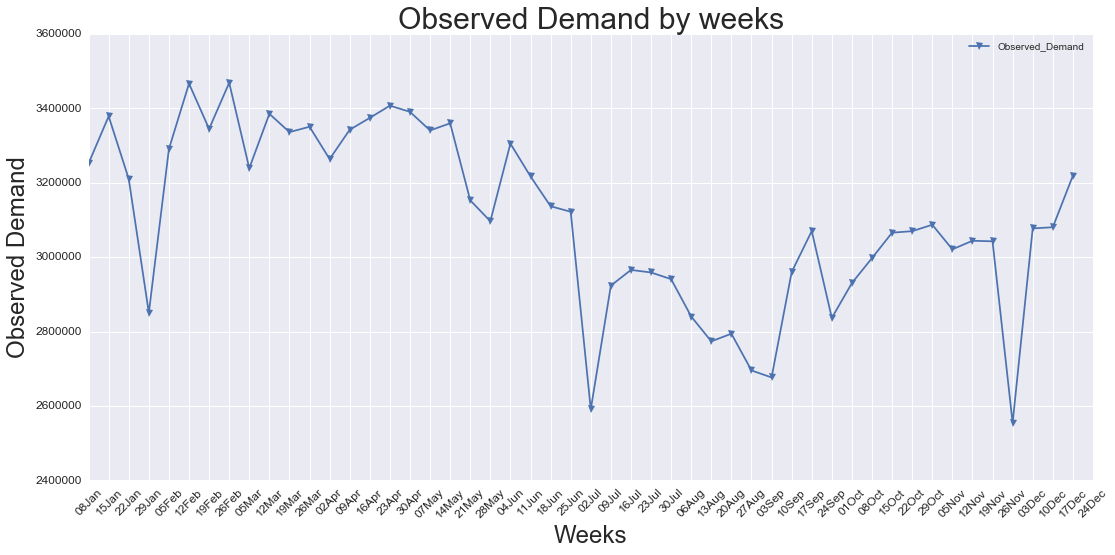

In [28]:
ax2 = plt.figure(figsize=(18,8), dpi=300).add_subplot(111)
ax2.set_ylabel('Observed Demand',size=24)
ax2.set_xlabel('Weeks',size=24)
ax2.get_xaxis().set_visible(True)
ax2.get_yaxis().set_visible(True)
ax2.xaxis.grid(True, which="major")
ax2.set_title('Observed Demand by weeks',fontsize=30)
#ax2.grid(color='Black')
xticks = pd.date_range(start='2015-01-06', end='2015-12-24', freq='W-Thu')

dttime_metrics_week_3[['Observed_Demand']][1:-2].plot(ax=ax2, style='-v',
                                                  
                                                  fontsize=12,
                                                  xticks=xticks.to_pydatetime()
                                                 )
ax2.set_xticklabels([x.strftime('%d%h') for x in xticks],rotation=45);
ax2.get_xaxis().set_visible(True)
#plt.xaxis
#plt.savefig('Observed_demand_by_Weeks.jpg')
                      

In [29]:
#dttime_metrics_week_3[['Excess_Supply']][1:-2].sort(ascending=True)

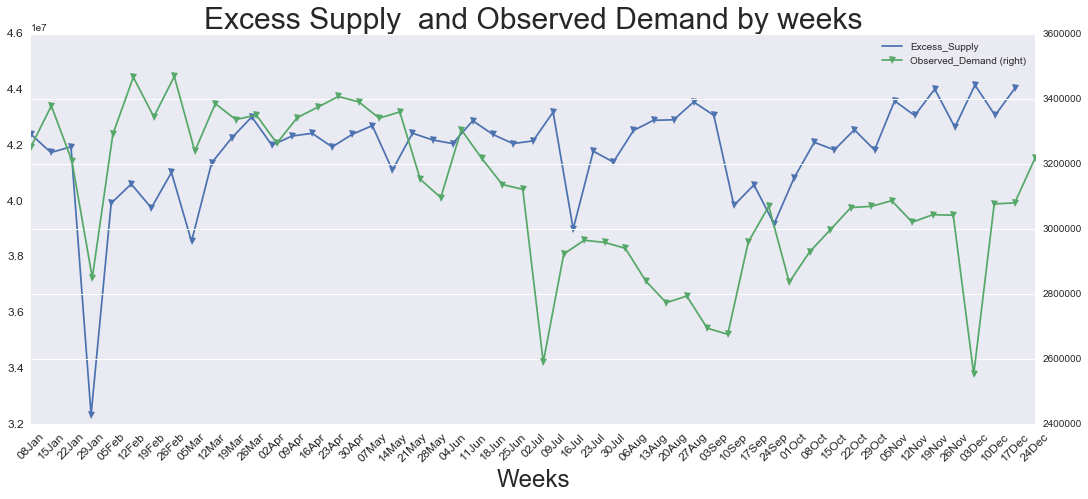

In [30]:
#%a\n%d\n%h\n%Y
ax2 = plt.figure(figsize=(18,7), dpi=300).add_subplot(111)
#ax2.set_ylabel('Excess Supply',size=24)
ax2.set_xlabel('Weeks',size = 24)
ax2.get_xaxis().set_visible(True)
ax2.get_yaxis().set_visible(True)
#ax3 = ax2.twinx()
#ax3.set_ylabel('Observed_demand', size=24)
ax2.xaxis.grid(True, which="major")
ax2.set_title('Excess Supply  and Observed Demand by weeks',fontsize=30)
#ax2.grid(color='Black')
xticks = pd.date_range(start='2015-01-06', end='2015-12-24', freq='W-Thu')
dttime_metrics_week_3[['Excess_Supply']][1:-2].plot(ax=ax2, style='-v',
                                                
                                                  fontsize=12,
                                                  xticks=xticks.to_pydatetime()
                                                 )
dttime_metrics_week_3[['Observed_Demand']][1:-2].plot(ax=ax2, style='-v',
                                                  secondary_y=True,
                                                  fontsize=12,
                                                  xticks=xticks.to_pydatetime()
                                                 )
ax2.set_xticklabels([x.strftime('%d%h') for x in xticks],rotation=45);
plt.savefig('Excess_SupplyandDemand_by_Weeks.jpg')
                       

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


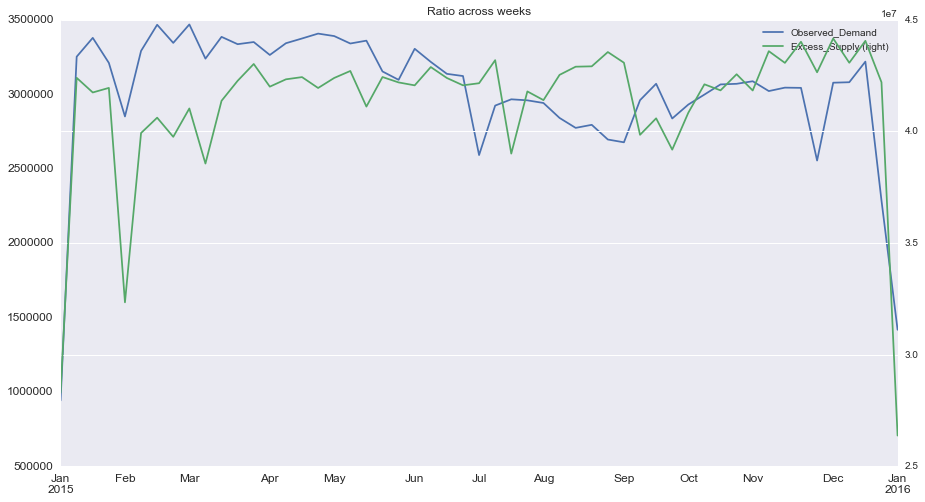

In [32]:
#df.A.plot(label="Points", legend=True)
#df.B.plot(secondary_y=True, label="Comments", legend=True)


fig, ax = plt.subplots(figsize=(15,8)) 

xticks = pd.date_range('01/01/2015', periods=53, freq='W')
ax.set_xticklabels(xticks)#([x for x in xticks])
ax.get_xaxis().set_visible(True)
#ax.set_xticks(pd.date_range('01/01/2015', periods=53, freq='W'))
ax.legend(s=20)
#ax.grid(color='black')
dttime_metrics_week_3[['Observed_Demand']].plot(title='Ratio across weeks',
                                                  ax=ax,fontsize=12,legend=True)
dttime_metrics_week_3[['Excess_Supply']].plot(title='Ratio across weeks',secondary_y=True,
                                                  ax=ax,fontsize=12,legend=True)




In [36]:
#dttime_metrics_week_3[['Total_unmet_ratio']][1:-2]

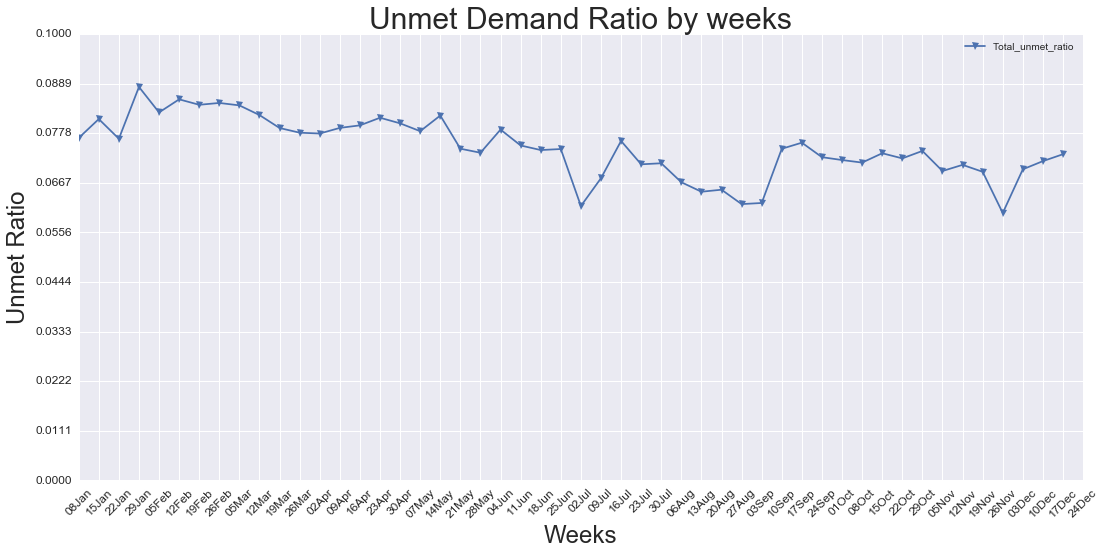

In [37]:
#%a\n%d\n%h\n%Y
ax2 = plt.figure(figsize=(18,8), dpi=300).add_subplot(111)
ax2.set_ylabel('Unmet Ratio',size=24)
ax2.set_xlabel('Weeks', size=24)
ax2.get_xaxis().set_visible(True)
ax2.get_yaxis().set_visible(True)
ax2.xaxis.grid(True, which="major")
ax2.set_title('Unmet Demand Ratio by weeks',fontsize=30)
#ax2.grid(color='Black')
#ax2.set_yticks(linspace(0, 1, 20))
xticks = pd.date_range(start='2015-01-06', end='2015-12-24', freq='W-Thu')
dttime_metrics_week_3[['Total_unmet_ratio']][1:-2].plot(ax=ax2, style='-v',
                                                
                                                  fontsize=12,
                                                  xticks=xticks.to_pydatetime(),
                                                  yticks = linspace(0,.1,10)
                                                 )
ax2.set_xticklabels([x.strftime('%d%h') for x in xticks],rotation=45);
#ax2.set_yticklabels([yticks]);
plt.savefig('Unmet_plot_by_weeks.jpg')


In [38]:
dttime_metrics_week_3[['Total_unmet_ratio']][1:-2].count()

Total_unmet_ratio    50
dtype: int64

#### Average Weekday/Weekend Plots

In [41]:
list(dttime_metrics_avg_weekday.columns)

['interv',
 'weekend_ind',
 'week_num',
 'tpep_demand',
 'tpep_freemins',
 'lpep_demand',
 'lpep_freemins']

In [42]:
dttime_metrics_avg_weekday['total_demand'] = dttime_metrics_avg_weekday['tpep_demand'] + dttime_metrics_avg_weekday['lpep_demand']
dttime_metrics_avg_weekday['total_freemins'] = dttime_metrics_avg_weekday['tpep_freemins'] + dttime_metrics_avg_weekday['lpep_freemins']

In [43]:
dttime_metrics_avg_weekday_1 = dttime_metrics_avg_weekday.groupby('weekend_ind')[['tpep_demand', 'tpep_freemins',
                                                                                  'lpep_demand','lpep_freemins', 
                                                                                  'total_demand', 'total_freemins']].mean()
print dttime_metrics_avg_weekday_1.shape
print dttime_metrics_avg_weekday_1.info()
dttime_metrics_avg_weekday_1.head()

(7, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 6 columns):
tpep_demand       7 non-null float64
tpep_freemins     7 non-null float64
lpep_demand       7 non-null float64
lpep_freemins     7 non-null float64
total_demand      7 non-null float64
total_freemins    7 non-null float64
dtypes: float64(6)
memory usage: 392.0 bytes
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,total_demand,total_freemins
weekend_ind,,,,,,
0,14418.671474,183237.707532,1775.370192,59278.665064,16194.041667,242516.372596
1,15627.387821,187765.501603,1829.947917,61046.472756,17457.335737,248811.974359
2,16369.852564,193106.004808,1965.582532,62987.987179,18335.435096,256093.991987
3,16524.120283,191244.955189,2144.786950,64010.592767,18668.907233,255255.547956
4,16916.604968,191214.566506,2439.894231,65542.599359,19356.499199,256757.165865


In [44]:
dttime_metrics_avg_weekday_2 = dttime_metrics_avg_weekday_1.copy()
dttime_metrics_avg_weekday_2['total_unmet_ratio'] = dttime_metrics_avg_weekday_2['total_demand']*1.0/dttime_metrics_avg_weekday_2['total_freemins']
dttime_metrics_avg_weekday_2['tpep_unmet_ratio'] = dttime_metrics_avg_weekday_2['tpep_demand']*1.0/dttime_metrics_avg_weekday_2['tpep_freemins']
dttime_metrics_avg_weekday_2['lpep_unmet_ratio'] = dttime_metrics_avg_weekday_2['lpep_demand']*1.0/dttime_metrics_avg_weekday_2['lpep_freemins']
print dttime_metrics_avg_weekday_2.shape
print dttime_metrics_avg_weekday_2.info()
dttime_metrics_avg_weekday_2.head()

(7, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
tpep_demand          7 non-null float64
tpep_freemins        7 non-null float64
lpep_demand          7 non-null float64
lpep_freemins        7 non-null float64
total_demand         7 non-null float64
total_freemins       7 non-null float64
total_unmet_ratio    7 non-null float64
tpep_unmet_ratio     7 non-null float64
lpep_unmet_ratio     7 non-null float64
dtypes: float64(9)
memory usage: 560.0 bytes
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,total_demand,total_freemins,total_unmet_ratio,tpep_unmet_ratio,lpep_unmet_ratio
weekend_ind,,,,,,,,,
0,14418.671474,183237.707532,1775.370192,59278.665064,16194.041667,242516.372596,0.066775,0.078688,0.029950
1,15627.387821,187765.501603,1829.947917,61046.472756,17457.335737,248811.974359,0.070163,0.083228,0.029976
2,16369.852564,193106.004808,1965.582532,62987.987179,18335.435096,256093.991987,0.071597,0.084771,0.031206
3,16524.120283,191244.955189,2144.786950,64010.592767,18668.907233,255255.547956,0.073138,0.086403,0.033507
4,16916.604968,191214.566506,2439.894231,65542.599359,19356.499199,256757.165865,0.075388,0.088469,0.037226


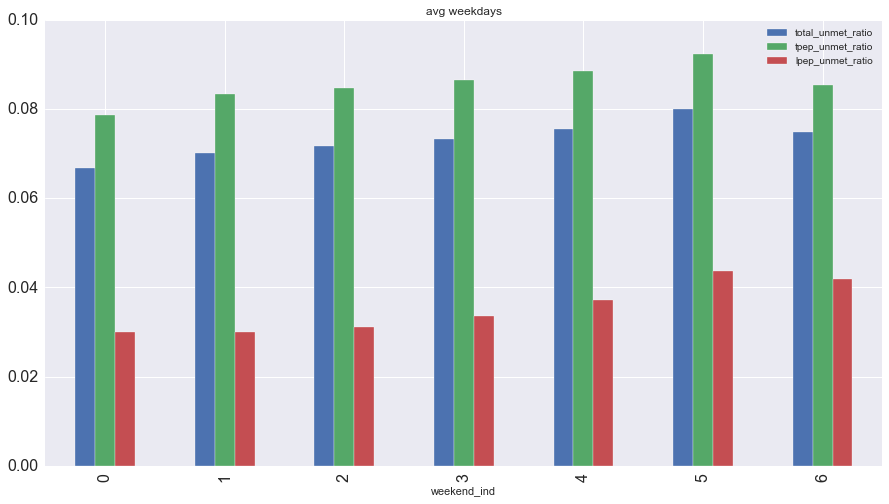

In [45]:
dttime_metrics_avg_weekday_2[['total_unmet_ratio', 'tpep_unmet_ratio', 'lpep_unmet_ratio']].plot(kind='bar',figsize=(15,8),
                                                                                                 title='avg weekdays',
                                                                                                 fontsize=16)

#### Average 24 Hours across Weekday/Weekend Plots

In [46]:
dttime_metrics_avg_hour = dttime_metrics_3.copy()

In [47]:
list(dttime_metrics_avg_hour.columns)

['interv',
 'weekend_ind',
 'week_num',
 'tpep_demand',
 'tpep_freemins',
 'lpep_demand',
 'lpep_freemins']

In [48]:
dttime_metrics_avg_hour['total_demand'] = dttime_metrics_avg_hour['tpep_demand'] + dttime_metrics_avg_hour['lpep_demand']
dttime_metrics_avg_hour['total_freemins'] = dttime_metrics_avg_hour['tpep_freemins'] + dttime_metrics_avg_hour['lpep_freemins']
dttime_metrics_avg_hour['weekday_weekend_ind'] = dttime_metrics_avg_hour['weekend_ind'].apply(lambda x: 1 if x<5 else 2)
dttime_metrics_avg_hour['day_hour'] = dttime_metrics_avg_hour['interv'].apply(lambda x: x.hour)
print dttime_metrics_avg_hour['day_hour'].unique()
dttime_metrics_avg_hour['day_hour'].head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


0    0
1    1
2    2
3    3
4    4
Name: day_hour, dtype: int64

In [49]:
dttime_metrics_avg_hour_1 = dttime_metrics_avg_hour[dttime_metrics_avg_hour.weekday_weekend_ind==1].groupby(['day_hour'])\
[['tpep_demand', 'tpep_freemins', 'lpep_demand','lpep_freemins', 'total_demand', 'total_freemins']].mean()
print dttime_metrics_avg_hour_1.shape
print dttime_metrics_avg_hour_1.info()
dttime_metrics_avg_hour_1.head()

(24, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
tpep_demand       24 non-null float64
tpep_freemins     24 non-null float64
lpep_demand       24 non-null float64
lpep_freemins     24 non-null float64
total_demand      24 non-null float64
total_freemins    24 non-null float64
dtypes: float64(6)
memory usage: 1.3 KB
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,total_demand,total_freemins
day_hour,,,,,,
0,11496.478927,211621.030651,1696.735632,43720.061303,13193.214559,255341.091954
1,7110.773946,188273.923372,1180.432950,35729.540230,8291.206897,224003.463602
2,4597.601533,143679.590038,773.310345,27869.666667,5370.911877,171549.256705
3,3087.651341,114239.919540,548.911877,22101.785441,3636.563218,136341.704981
4,2780.091954,107073.563218,510.720307,20164.199234,3290.812261,127237.762452


In [50]:
dttime_metrics_avg_hour_2 = dttime_metrics_avg_hour_1.copy()
dttime_metrics_avg_hour_2['total_unmet_ratio'] = dttime_metrics_avg_hour_2['total_demand']*1.0/dttime_metrics_avg_hour_2['total_freemins']
dttime_metrics_avg_hour_2['tpep_unmet_ratio'] = dttime_metrics_avg_hour_2['tpep_demand']*1.0/dttime_metrics_avg_hour_2['tpep_freemins']
dttime_metrics_avg_hour_2['lpep_unmet_ratio'] = dttime_metrics_avg_hour_2['lpep_demand']*1.0/dttime_metrics_avg_hour_2['lpep_freemins']
print dttime_metrics_avg_hour_2.shape
print dttime_metrics_avg_hour_2.info()
dttime_metrics_avg_hour_2.head()

(24, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 9 columns):
tpep_demand          24 non-null float64
tpep_freemins        24 non-null float64
lpep_demand          24 non-null float64
lpep_freemins        24 non-null float64
total_demand         24 non-null float64
total_freemins       24 non-null float64
total_unmet_ratio    24 non-null float64
tpep_unmet_ratio     24 non-null float64
lpep_unmet_ratio     24 non-null float64
dtypes: float64(9)
memory usage: 1.9 KB
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,total_demand,total_freemins,total_unmet_ratio,tpep_unmet_ratio,lpep_unmet_ratio
day_hour,,,,,,,,,
0,11496.478927,211621.030651,1696.735632,43720.061303,13193.214559,255341.091954,0.051669,0.054326,0.038809
1,7110.773946,188273.923372,1180.432950,35729.540230,8291.206897,224003.463602,0.037014,0.037768,0.033038
2,4597.601533,143679.590038,773.310345,27869.666667,5370.911877,171549.256705,0.031308,0.031999,0.027747
3,3087.651341,114239.919540,548.911877,22101.785441,3636.563218,136341.704981,0.026672,0.027028,0.024836
4,2780.091954,107073.563218,510.720307,20164.199234,3290.812261,127237.762452,0.025863,0.025964,0.025328


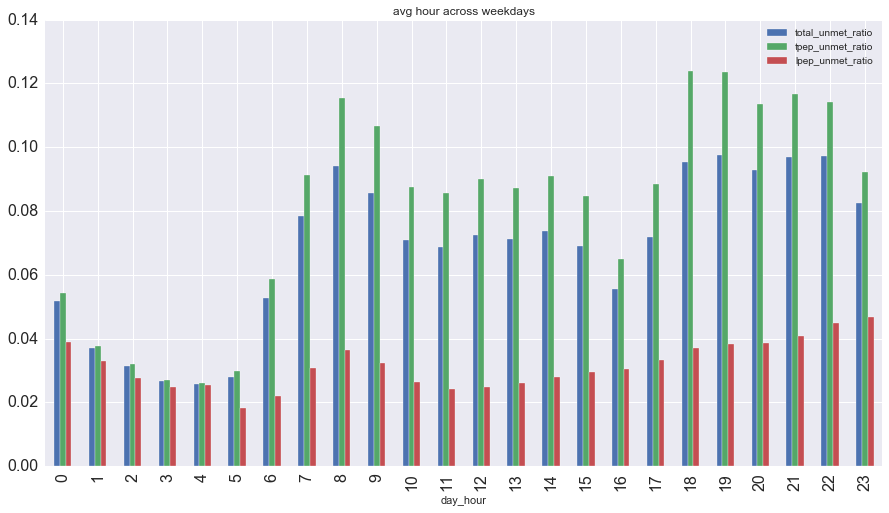

In [51]:
dttime_metrics_avg_hour_2[['total_unmet_ratio', 'tpep_unmet_ratio', 'lpep_unmet_ratio']].plot(kind='bar',figsize=(15,8),
                                                                                             title='avg hour across weekdays',
                                                                                             fontsize=16)

In [52]:
dttime_metrics_avg_hour_3 = dttime_metrics_avg_hour[dttime_metrics_avg_hour.weekday_weekend_ind==2].groupby(['day_hour'])\
[['tpep_demand', 'tpep_freemins', 'lpep_demand','lpep_freemins', 'total_demand', 'total_freemins']].mean()
print dttime_metrics_avg_hour_3.shape
print dttime_metrics_avg_hour_3.info()
dttime_metrics_avg_hour_3.head()

(24, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
tpep_demand       24 non-null float64
tpep_freemins     24 non-null float64
lpep_demand       24 non-null float64
lpep_freemins     24 non-null float64
total_demand      24 non-null float64
total_freemins    24 non-null float64
dtypes: float64(6)
memory usage: 1.3 KB
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,total_demand,total_freemins
day_hour,,,,,,
0,22956.230769,187211.653846,4276.076923,67881.355769,27232.307692,255093.009615
1,20516.240385,198210.557692,3880.576923,64062.942308,24396.817308,262273.500000
2,16721.134615,193832.759615,3183.000000,57496.451923,20065.009709,251329.211538
3,12775.798077,185314.067308,2541.076923,50500.451923,15316.875000,235814.519231
4,8147.317308,169354.192308,1917.903846,43742.269231,10065.221154,213096.461538


In [53]:
dttime_metrics_avg_hour_4 = dttime_metrics_avg_hour_3.copy()
dttime_metrics_avg_hour_4['total_unmet_ratio'] = dttime_metrics_avg_hour_4['total_demand']*1.0/dttime_metrics_avg_hour_4['total_freemins']
dttime_metrics_avg_hour_4['tpep_unmet_ratio'] = dttime_metrics_avg_hour_4['tpep_demand']*1.0/dttime_metrics_avg_hour_4['tpep_freemins']
dttime_metrics_avg_hour_4['lpep_unmet_ratio'] = dttime_metrics_avg_hour_4['lpep_demand']*1.0/dttime_metrics_avg_hour_4['lpep_freemins']
print dttime_metrics_avg_hour_4.shape
print dttime_metrics_avg_hour_4.info()
dttime_metrics_avg_hour_4.head()

(24, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 9 columns):
tpep_demand          24 non-null float64
tpep_freemins        24 non-null float64
lpep_demand          24 non-null float64
lpep_freemins        24 non-null float64
total_demand         24 non-null float64
total_freemins       24 non-null float64
total_unmet_ratio    24 non-null float64
tpep_unmet_ratio     24 non-null float64
lpep_unmet_ratio     24 non-null float64
dtypes: float64(9)
memory usage: 1.9 KB
None


,tpep_demand,tpep_freemins,lpep_demand,lpep_freemins,total_demand,total_freemins,total_unmet_ratio,tpep_unmet_ratio,lpep_unmet_ratio
day_hour,,,,,,,,,
0,22956.230769,187211.653846,4276.076923,67881.355769,27232.307692,255093.009615,0.106754,0.122622,0.062993
1,20516.240385,198210.557692,3880.576923,64062.942308,24396.817308,262273.500000,0.093021,0.103507,0.060574
2,16721.134615,193832.759615,3183.000000,57496.451923,20065.009709,251329.211538,0.079836,0.086266,0.055360
3,12775.798077,185314.067308,2541.076923,50500.451923,15316.875000,235814.519231,0.064953,0.068941,0.050318
4,8147.317308,169354.192308,1917.903846,43742.269231,10065.221154,213096.461538,0.047233,0.048108,0.043846


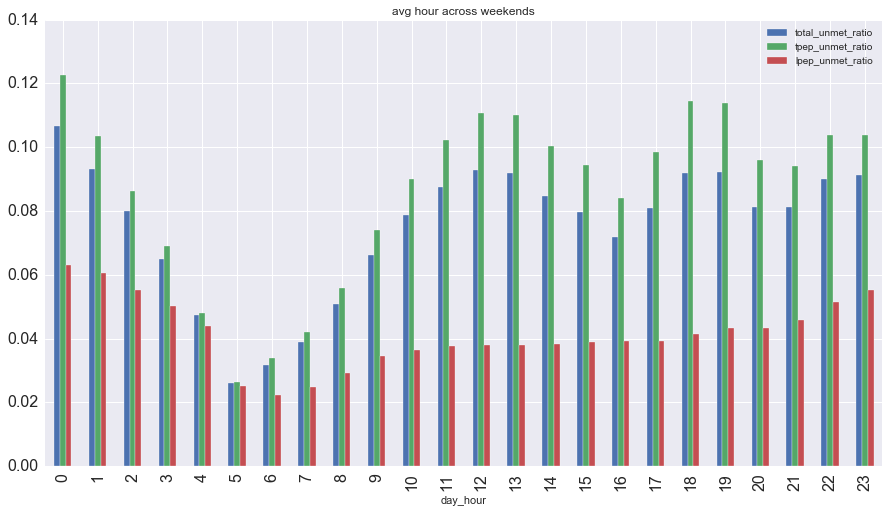

In [54]:
dttime_metrics_avg_hour_4[['total_unmet_ratio', 'tpep_unmet_ratio', 'lpep_unmet_ratio']].plot(kind='bar',figsize=(15,8),
                                                                                             title='avg hour across weekends',
                                                                                             fontsize=16)